<a href="https://colab.research.google.com/github/DiogoGMelo/Confusion_matrix/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* numpy = manipulação de arrays
* matplotlib.pyplot = visualização gráfica
* seaborn = criar a matriz de cunfusão
* tensorflow e keras = treinar e costruir o modelo
* sklearn = calcular as metricas de avaliação

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Carrega o MNIST como base de dados para o treinamento contendo imagens manuscritas dos digitos de 0 a 9


---



In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Normalização dos dados, de 255 pixels para entre 0 e 1

---



In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Criando o modelo de rede neural, com 128 neurônios ocultos e 10 neurônios de saída


---



In [4]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # Camada de entrada (achatamento da imagem)
    keras.layers.Dense(128, activation='relu'),   # Camada oculta com 128 neurônios
    keras.layers.Dense(10, activation='softmax')  # Camada de saída (10 classes para os dígitos 0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compila e treina o modelo

---



In [5]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [6]:
modelo.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8794 - loss: 0.4286 - val_accuracy: 0.9592 - val_loss: 0.1381
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9649 - loss: 0.1208 - val_accuracy: 0.9712 - val_loss: 0.0940
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0741 - val_accuracy: 0.9747 - val_loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0571 - val_accuracy: 0.9751 - val_loss: 0.0836
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9858 - loss: 0.0449 - val_accuracy: 0.9776 - val_loss: 0.0705


Faz previsões para os dados de teste, obtém a classe com maior probabilidade e gera a matriz de confusão

---



In [7]:
y_pred = np.argmax(modelo.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


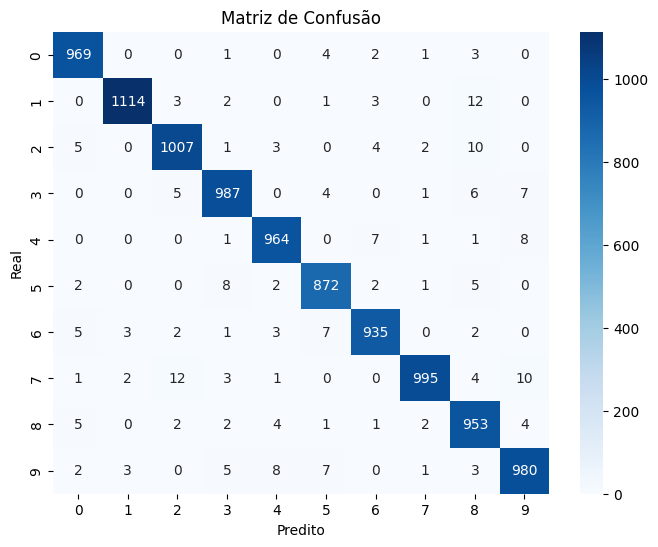

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Calcula as métricas de avaliação

---



In [9]:
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='macro')
sensibilidade = recall_score(y_test, y_pred, average='macro')  # Recall (Sensibilidade)
f1 = f1_score(y_test, y_pred, average='macro')

In [10]:
especificidades = []
for classe in range(10):
    tn = np.sum(cm) - (np.sum(cm[classe, :]) + np.sum(cm[:, classe]) - cm[classe, classe])
    fp = np.sum(cm[:, classe]) - cm[classe, classe]
    especificidade = tn / (tn + fp) if (tn + fp) != 0 else 0
    especificidades.append(especificidade)
especificidade_media = np.mean(especificidades)

In [11]:
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Sensibilidade (Recall): {sensibilidade:.4f}")
print(f"Especificidade: {especificidade_media:.4f}")
print(f"F1-score: {f1:.4f}")

Acurácia: 0.9776
Precisão: 0.9774
Sensibilidade (Recall): 0.9776
Especificidade: 0.9975
F1-score: 0.9775
